# Preprocessing

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import datetime
from geopy.geocoders import Nominatim
from sklearn import preprocessing 
warnings.filterwarnings('ignore') 

In [152]:
# # Test data
# data = pd.read_csv('C:/Users/susum/Documents/year5_sem1/QBUS3820/Group_Assignment/test-1.csv')
# pd.set_option('display.max_columns', len(data.columns))
# data.head()

In [153]:
# Train data
data = pd.read_csv('C:/Users/susum/Documents/year5_sem1/QBUS3820/Group_Assignment/train-1.csv')
pd.set_option('display.max_columns', len(data.columns))
data.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_discount,monthly_discount,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,Brand New House with Private Bathroom Miranda,New house built in (Phone number hidden by Air...,Guests are welcomed to use all amenities avail...,New house built in (Phone number hidden by Air...,none,There’s a massive Westfield shopping centre ne...,"1, This is not the only room in the house bein...",Miranda train station is about 10-15 mins walk...,"Family area, living area, laundry area, backya...",I don’t personally live in the house anymore a...,NaN,50605711,2015-12-05,"Miranda, New South Wales, Australia",Just got back to Sydney in Jan 2019 after livi...,within an hour,100%,100%,f,NaN,5.0,5.0,"['email', 'phone', 'jumio', 'offline_governmen...",f,"Miranda, NSW, Australia",NaN,Sutherland Shire,Miranda,2228,"Miranda, Australia",-34.02896,151.10229,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Kitchen,""Free parking on premises"",Breakfa...",NaN,NaN,NaN,203.0,0.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,22,43,43,43,48,48,2019-03-22,2020-01-24,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,t,f,strict_14_with_grace_period,f,f,4,0,4,0,4.35,$74.00
1,Single bedroom apartment in heart of Randwick,"Furnished, single bedroom apartment, Bedroom, ...",NaN,"Furnished, single bedroom apartment, Bedroom, ...",none,Randwick junction is at 5 minutes walk with al...,NaN,"Al the major bus stops to Sydney CBD, Bondi Be...",NaN,Host 'll be available 24/7 on call and nearby,NaN,120832230,2017-03-15,AU,NaN,NaN,NaN,NaN,f,Randwick,1.0,1.0,"['email', 'phone']",f,"Randwick, NSW, Australia",Randwick,Randwick,Randwick,2031,"Randwick, Australia",-33.91539,151.23659,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Kitchen,Heating,Washer,Dryer,""Smoke detector""...",NaN,NaN,NaN,NaN,NaN,1,0.0,3,26,3,3,26,26,3.0,26.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,strict_14_with_grace_period,f,f,1,0,1,0,NaN,$63.00
2,Couples stylish retreat 10 mins to Sydney city,Stylish Victorian terrace. 1 king size bed and...,"Bedroom king size bed ,bathroom, lounge, dinin...",Stylish Victorian terrace. 1 king size bed and...,none,"7 mins walk to train station, 1 stop to thrivi...",If staying on Sunday night please put garbage ...,"Parramatta road 2 minutes buses to everywhere,...",The whole house except for 2 private rooms.,"Available for questions by email, phone or text.",When leaving please strip bed put all used lin...,35339631,2015-06-08,"Sydney, New South Wales, Australia","Hairstylist, fashion guru, Love beautiful thin...",within an hour,100%,100%,t,Stanmore,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",f,"Stanmore, NSW, Australia",S

In [154]:
data.cleaning_fee_perc

0          0.0
1          NaN
2        102.0
3         21.0
4         43.0
5          7.0
6         54.0
7         35.0
8         30.0
9         62.0
10        52.0
11        78.0
12        91.0
13       120.0
14         NaN
15        59.0
16        39.0
17         NaN
18        54.0
19        38.0
20        27.0
21         0.0
22         NaN
23        29.0
24        60.0
25        54.0
26         NaN
27        17.0
28       139.0
29         NaN
30        25.0
31        58.0
32        75.0
33        59.0
34        40.0
35        25.0
36        17.0
37        99.0
38        52.0
39        56.0
40        56.0
41        24.0
42        60.0
43        45.0
44         NaN
45         NaN
46        14.0
47       117.0
48         0.0
49         NaN
50        49.0
51        47.0
52         NaN
53        94.0
54         NaN
55        51.0
56        78.0
57        63.0
58        29.0
59        72.0
60         NaN
61        26.0
62        34.0
63       158.0
64        91.0
65        46.0
66        

## Missing Values

In [72]:
pd.set_option('display.max_rows',None)
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value = pd.DataFrame({'percent_missing': percent_missing})

# Sort with descending order 
missing_value = missing_value.sort_values(by = 'percent_missing', ascending = False)
missing_value.to_csv(r'C:\Users\susum\Documents\year5_sem1\QBUS3820\Group_Assignment\Attempt_1\missing_value.csv',index = False, header = True)
missing_value

,percent_missing
square_feet,99.473437
monthly_discount,95.326751
weekly_discount,92.195581
notes,58.044194
host_about,44.983545
access,42.839680
host_response_rate,42.049835
host_response_time,42.049835
house_rules,41.777151
interaction,38.307475


In [73]:
# Drop because the number of nulls is more than 90% 
cols_to_drop = [ 'square_feet',
                 'weekly_discount',
                 'monthly_discount',
                 'space']
data = data.drop(cols_to_drop, axis = 1)

In [74]:
# Replace null values with 0 
to_fill = ['security_deposit_perc',
            'cleaning_fee_perc',
            'extra_people_perc',
            'review_scores_rating',
            'review_scores_accuracy',
            'review_scores_cleanliness',
            'reviews_per_month',
            'review_scores_checkin',
            'review_scores_communication',
            'review_scores_location',
            'review_scores_value',
            'host_response_rate']
for i in to_fill:
    data[i] = data[i].fillna(0)

In [75]:
# fill NA values fwith missing
data['host_response_time'] = data['host_response_time'].fillna('Missing')

In [76]:
# Fill bathrooms, bedrooms and bed with median values 
for col in ['bathrooms','bedrooms','beds']:
    data[col].fillna(data[col].median(),inplace = True)

In [77]:
# replace NaN with zipcode values from geolocator
idx = data.columns.get_loc('zipcode')
cannot = []
for i,z in enumerate(data['zipcode']):
    try:
        int(float(z))
    except:
        cannot.append(i)

geolocator = Nominatim(user_agent="airbnb")
for i in cannot:
    location = geolocator.reverse(f'{data.latitude[i]}, {data.longitude[i]}')
    l = location.address
    zipcode = re.findall(r'[0-9]+',l)
    for z in zipcode:
        z = int(z)
        if  (1000 <= z <=2999):
            zipcode = z
            data.iloc[i,idx] = zipcode
            
# Uniform data type to int
data['zipcode'].astype(float).astype(int)
print(data['zipcode'].isna().sum())

0


## Natural Language Processing

In [78]:
# Remove features that require natural language processing 
cols_to_drop = ['neighborhood_overview',
               'access',
               'interaction',
               'house_rules',
               'host_about',
               'notes',
               'transit',
               'name',
               'summary',
               'description',
               'experiences_offered']
data = data.drop(cols_to_drop, axis = 1)

## Unify Data Type

In [79]:
# Remove % for rating columns
data['host_response_rate'] = data['host_response_rate'].str.replace('%','')
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('%','')
data['host_response_rate'] = data['host_response_rate'].astype(float)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

to_fill = ['host_acceptance_rate','host_response_rate']
for i in to_fill:
    data[i] = data[i].fillna(0)

# clean up price since there are $ (e.g. $ 150) and , (e.g. $1,500) in numbers
data['price'] = data['price'].str.replace('$','')
data['price'] = data['price'].str.replace(',','')
data['price'] = data['price'].astype(float)

## Binary Variables

In [80]:
# Replace true or false by 1 and 0 respectively 
data.host_is_superhost.replace(['t', 'f'], [1, 0], inplace=True)
data.host_identity_verified.replace(['t', 'f'], [1, 0], inplace=True)
data.is_location_exact.replace(['t', 'f'], [1, 0], inplace=True)
data.requires_license.replace(['t', 'f'], [1, 0], inplace=True)
data.instant_bookable.replace(['t', 'f'], [1, 0], inplace=True)
data.is_business_travel_ready.replace(['t', 'f'], [1, 0], inplace=True)
data.require_guest_profile_picture.replace(['t', 'f'], [1, 0], inplace=True)
data.require_guest_phone_verification.replace(['t', 'f'], [1, 0], inplace=True)

In [81]:
data.head()

,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,50605711,2015-12-05,"Miranda, New South Wales, Australia",within an hour,100.0,100.0,0,NaN,5.0,5.0,"['email', 'phone', 'jumio', 'offline_governmen...",0,"Miranda, NSW, Australia",NaN,Sutherland Shire,Miranda,2228,"Miranda, Australia",-34.02896,151.10229,1,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Kitchen,""Free parking on premises"",Breakfa...",203.0,0.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,22,43,43,43,48,48,2019-03-22,2020-01-24,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,1,0,strict_14_with_grace_period,0,0,4,0,4,0,4.35,74.0
1,120832230,2017-03-15,AU,Missing,0.0,0.0,0,Randwick,1.0,1.0,"['email', 'phone']",0,"Randwick, NSW, Australia",Randwick,Randwick,Randwick,2031,"Randwick, Australia",-33.91539,151.23659,1,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Kitchen,Heating,Washer,Dryer,""Smoke detector""...",0.0,0.0,1,0.0,3,26,3,3,26,26,3.0,26.0,0,0,0,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,strict_14_with_grace_period,0,0,1,0,1,0,0.00,63.0
2,35339631,2015-06-08,"Sydney, New South Wales, Australia",within an hour,100.0,100.0,1,Stanmore,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",0,"Stanmore, NSW, Australia",Stanmore,Marrickville,Stanmore,2048,"Stanmore, Australia",-33.88847,151.16651,1,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Breakfast,...",568.0,102.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,10,40,40,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,strict_14_with_grace_period,0,0,1,1,0,0,0.00,176.0
3,115440332,2017-02-08,"Sydney, New South Wales, Australia",Missing,0.0,0.0,0,Fairlight,1.0,1.0,"['email', 'phone', 'reviews']",0,"Fairlight (Manly), NSW, Australia",Fairlight,Manly,Fairlight (Manly),2094.0,"Fairlight (Manly), Australia",-33.80042,151.27293,1,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",513.0,21.0,2,10.0,5,1125,5,5,1125,1125,5.0,1125.0,0,0,0,0,12,0,2017-02-21,2018-03-06,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,strict_14_with_grace_period,0,0,1,1,0,0,0.33,195.0
4,25713478,2015-01-06,"Sydney, New South Wales, Australia",Missing,0.0,0.0,0,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",0,"Dee Why, NSW, Australia",NaN,Warringah,Dee Why,2099.0,"Dee Why, Australia",-33.75705,151.29361,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Breakfast,Heating,""Family/kid...",0.0,43.0,1,0.0,2,10,2,2,10,10,2.0,10.0,0,0,0,0,1,0,2018-02-18,2018-02-18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,flexible,0,0,1,0,1,0,0.04,51.0


# Exploratory Data Analysis

## Price

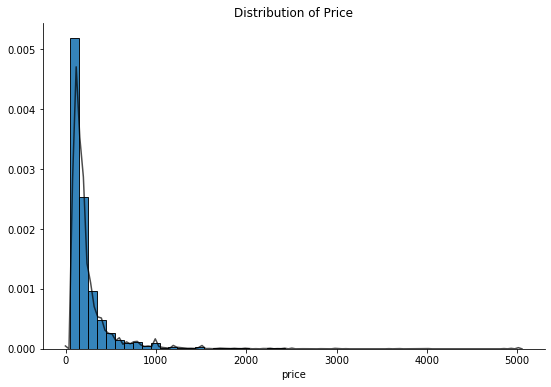

In [82]:
from statlearning import plot_dist
fig, ax  = plot_dist(data['price'])
ax.set_title('Distribution of Price')
plt.show()

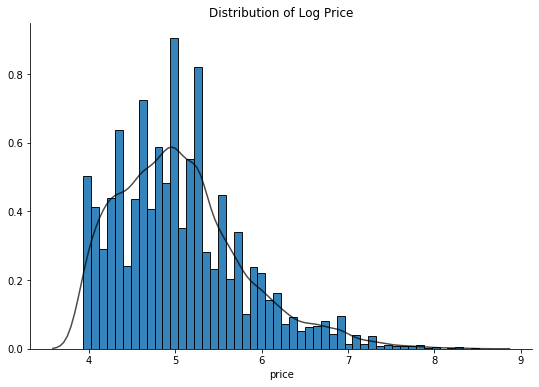

In [83]:
fig, ax  = plot_dist(np.log(data['price']))
ax.set_title('Distribution of Log Price')
plt.show()

In [84]:
columns=['Median',
         'Mean', 
         'Min value',
         'Max value']

rows=['price']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

for i,r in enumerate(rows):
    results.iloc[i,0] =  data[r].median()
    results.iloc[i,1] =  data[r].mean()
    results.iloc[i,2] = data[r].min()
    results.iloc[i,3] = data[r].max()
    
results

,Median,Mean,Min value,Max value
price,144.0,217.969535,51.0,5000.0


## Binary Features
Here we can see that is_business_ready, require_guest_phone_verification, require_guest_profile_picture and requires_license binary variables does not provide much information to the data.

In [85]:
binary = ['host_is_superhost',
         'host_identity_verified',
         'is_location_exact',
         'requires_license',
         'instant_bookable',
         'is_business_travel_ready',
         'require_guest_profile_picture',
         'require_guest_phone_verification']

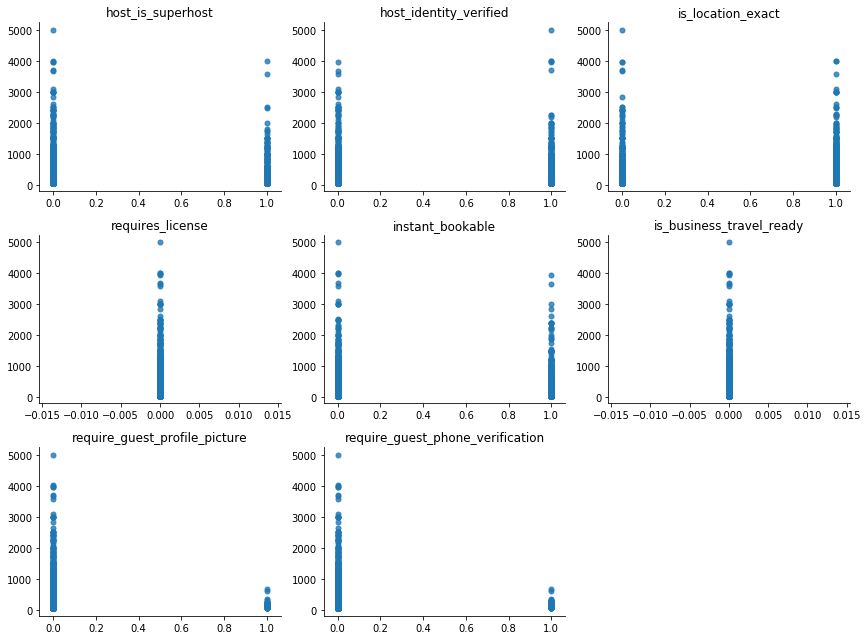

In [86]:
from statlearning import plot_regressions
plot_regressions(data[binary],data['price'],lowess = True) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002553AE29748>,
      dtype=object)

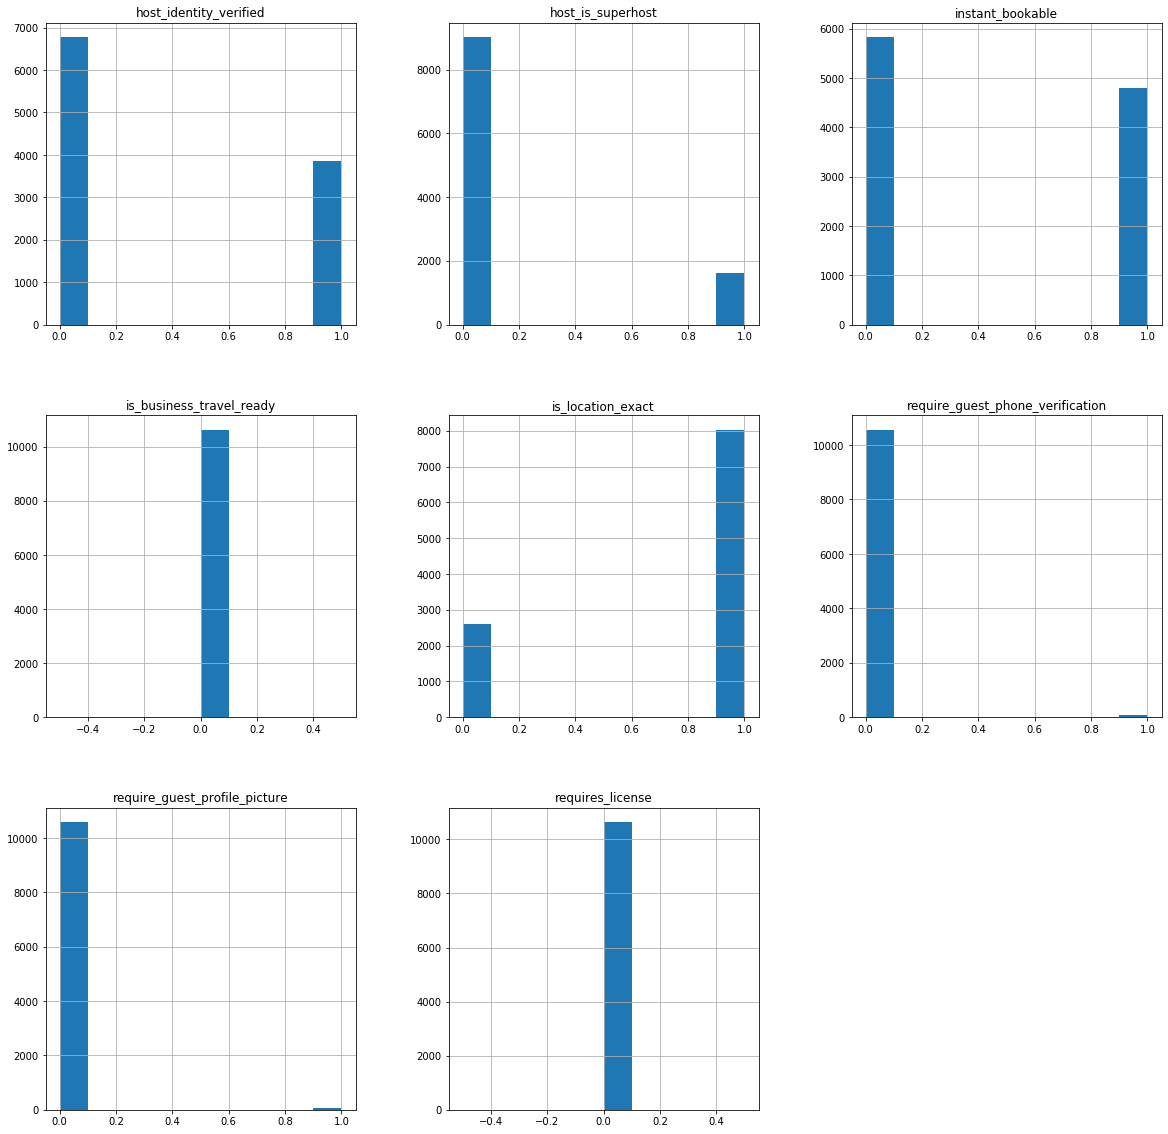

In [87]:
# Plotting the distribution of binary variables
data[binary].hist(figsize=(20,20))

In [88]:
columns=['Median',
         'Frequency of the median value', 
         '% of the median value']

rows=binary
results=pd.DataFrame(0.0, columns=columns, index=rows) 

for i,r in enumerate(rows):
    results.iloc[i,0] =  data[r].median()
    results.iloc[i,1] =  len(data[data[r]==data[r].median()])
    results.iloc[i,2] = (len(data[data[r]==data[r].median()]))/len(data[r])*100
    
results

,Median,Frequency of the median value,% of the median value
host_is_superhost,0.0,9021.0,84.823695
host_identity_verified,0.0,6780.0,63.751763
is_location_exact,1.0,8033.0,75.533615
requires_license,0.0,10635.0,100.000000
instant_bookable,0.0,5835.0,54.866008
is_business_travel_ready,0.0,10635.0,100.000000
require_guest_profile_picture,0.0,10583.0,99.511048
require_guest_phone_verification,0.0,10569.0,99.379408


## Categorical Features

### Cancellation Policy

In [89]:
variable = 'cancellation_policy'

columns=['Frequency','% of the whole column','median price']

rows= data[variable].unique()

results=pd.DataFrame(0.0, columns=columns, index=rows) 

for i,r in enumerate(rows):
    results.iloc[i,0] =  data.bed_type[data[variable]==r].count()
    results.iloc[i,1] =  (data.bed_type[data[variable]==r].count())/len(data.bed_type[data[variable]])*100
    results.iloc[i,2] =  data.loc[data.bed_type[data[variable]==r].index.tolist(),'price'].median()
    
results = results.sort_values(by = 'Frequency', ascending = False)
results

,Frequency,% of the whole column,median price
strict_14_with_grace_period,4657.0,43.789375,170.0
flexible,3213.0,30.211566,115.0
moderate,2667.0,25.077574,129.0
super_strict_60,66.0,0.620592,408.5
super_strict_30,29.0,0.272685,207.0
luxury_super_strict_125,2.0,0.018806,2712.5
luxury_moderate,1.0,0.009403,1549.0


### Neighbourhood cleansed

In [90]:
variable = 'neighbourhood_cleansed'

columns=['Frequency','% of the whole column','median price']

rows= data[variable].unique()

results=pd.DataFrame(0.0, columns=columns, index=rows) 

for i,r in enumerate(rows):
    results.iloc[i,0] =  data.bed_type[data[variable]==r].count()
    results.iloc[i,1] =  (data.bed_type[data[variable]==r].count())/len(data.bed_type[data[variable]])*100
    results.iloc[i,2] =  data.loc[data.bed_type[data[variable]==r].index.tolist(),'price'].median()
    
results = results.sort_values(by = 'Frequency', ascending = False)
results

,Frequency,% of the whole column,median price
Sydney,2861.0,26.901740,150.0
Waverley,1515.0,14.245416,165.0
Randwick,886.0,8.330983,128.5
Warringah,548.0,5.152797,159.0
Manly,494.0,4.645040,199.0
Woollahra,468.0,4.400564,159.0
North Sydney,395.0,3.714151,146.0
Pittwater,360.0,3.385049,340.0
Marrickville,324.0,3.046544,100.0
Leichhardt,293.0,2.755054,150.0


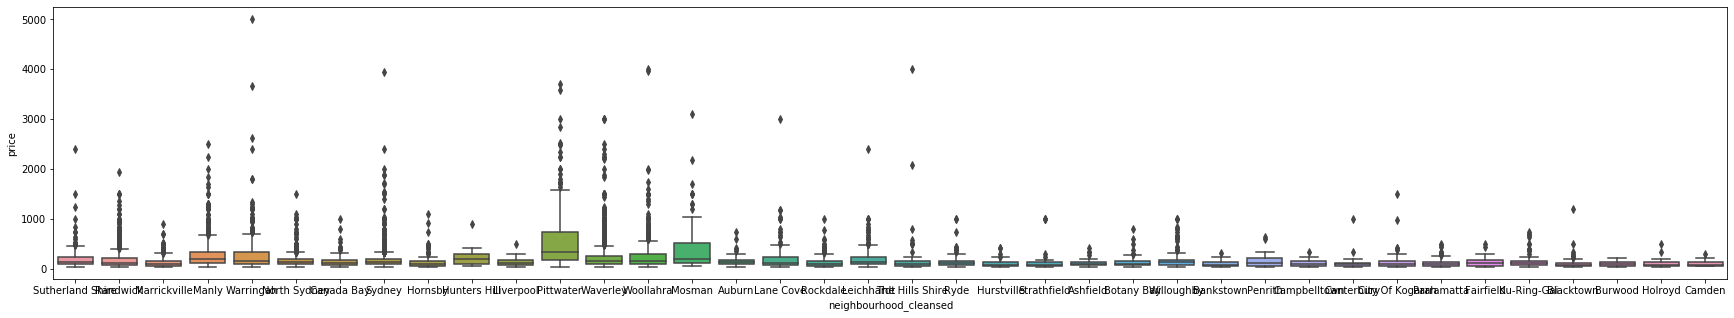

In [91]:
plt.figure(figsize=(30,5))
sns.boxplot(x="neighbourhood_cleansed", y="price", data=data)

### Property Type

In [92]:
variable = 'property_type'

columns=['Frequency','% of the whole column','median price']

rows= data[variable].unique()

results=pd.DataFrame(0.0, columns=columns, index=rows) 

for i,r in enumerate(rows):
    results.iloc[i,0] =  data.bed_type[data[variable]==r].count()
    results.iloc[i,1] =  (data.bed_type[data[variable]==r].count())/len(data.bed_type[data[variable]])*100
    results.iloc[i,2] =  data.loc[data.bed_type[data[variable]==r].index.tolist(),'price'].median()
    
results = results.sort_values(by = 'Frequency', ascending = False)
results

,Frequency,% of the whole column,median price
Apartment,6439.0,60.545369,140.0
House,2692.0,25.312647,199.0
Townhouse,451.0,4.240715,140.0
Guest suite,216.0,2.031030,110.0
Condominium,208.0,1.955806,125.0
Guesthouse,155.0,1.457452,112.0
Villa,75.0,0.705219,176.0
Serviced apartment,63.0,0.592384,180.0
Loft,58.0,0.545369,143.5
Bungalow,51.0,0.479549,132.0


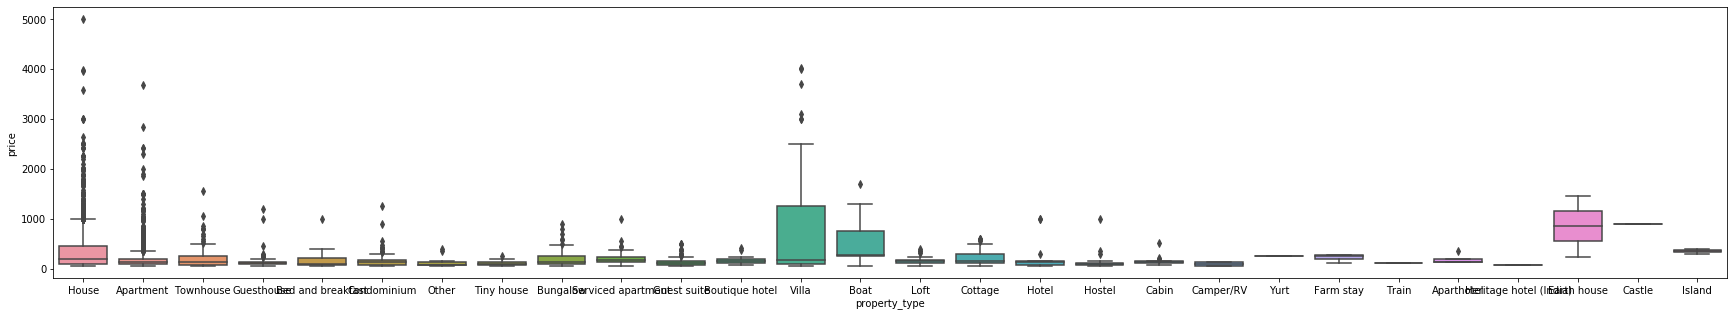

In [93]:
plt.figure(figsize=(30,5))
sns.boxplot(x="property_type", y="price", data=data);

### Room Type

In [94]:
variable = 'room_type'

columns=['Frequency','% of the whole column','median price']

rows= data[variable].unique()

results=pd.DataFrame(0.0, columns=columns, index=rows) 

for i,r in enumerate(rows):
    results.iloc[i,0] =  data.bed_type[data[variable]==r].count()
    results.iloc[i,1] =  (data.bed_type[data[variable]==r].count())/len(data.bed_type[data[variable]])*100
    results.iloc[i,2] =  data.loc[data.bed_type[data[variable]==r].index.tolist(),'price'].median()
    
results = results.sort_values(by = 'median price', ascending = False)
results

,Frequency,% of the whole column,median price
Entire home/apt,7334.0,68.960978,180.0
Hotel room,65.0,0.611189,159.0
Private room,3171.0,29.816643,77.0
Shared room,65.0,0.611189,74.0


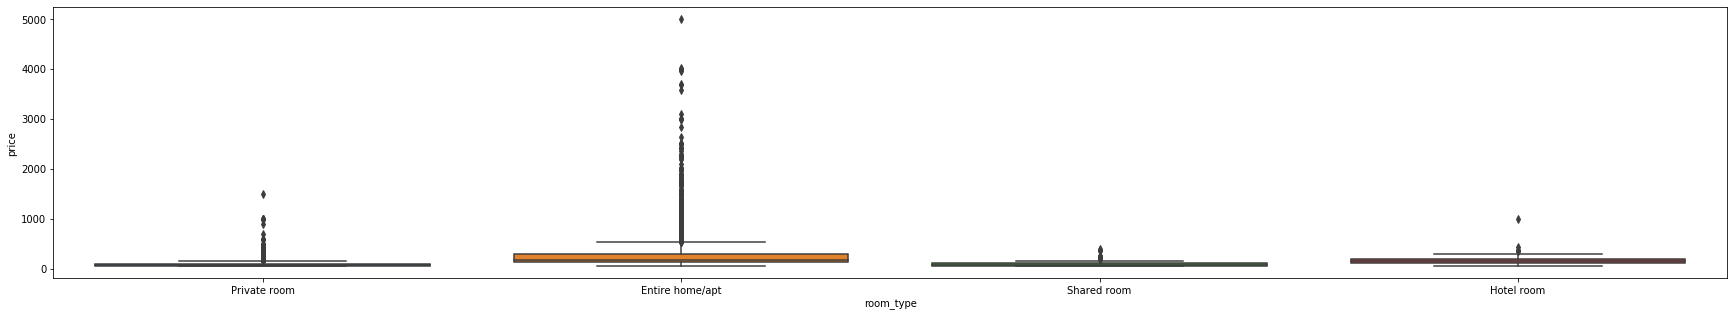

In [95]:
plt.figure(figsize=(30,5))
sns.boxplot(x="room_type", y="price", data=data)

### Bed Type

In [96]:
variable = 'bed_type'

columns=['Frequency','% of the whole column','median price']

rows= data[variable].unique()

results=pd.DataFrame(0.0, columns=columns, index=rows) 

for i,r in enumerate(rows):
    results.iloc[i,0] =  data.bed_type[data[variable]==r].count()
    results.iloc[i,1] =  (data.bed_type[data[variable]==r].count())/len(data.bed_type[data[variable]])*100
    results.iloc[i,2] =  data.loc[data.bed_type[data[variable]==r].index.tolist(),'price'].median()
    
results = results.sort_values(by = 'median price', ascending = False)
results

,Frequency,% of the whole column,median price
Couch,2.0,0.018806,273.5
Real Bed,10595.0,99.623883,144.0
Pull-out Sofa,28.0,0.263282,102.0
Futon,10.0,0.094029,88.5


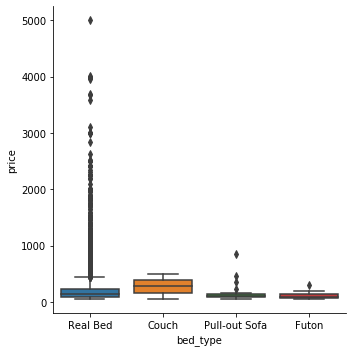

In [97]:
sns.catplot(x="bed_type", y="price", kind="box", data=data);

### Host Response Time

In [98]:
variable = 'host_response_time'

columns=['Frequency','% of the whole column','median price']

rows= data[variable].unique()

results=pd.DataFrame(0.0, columns=columns, index=rows) 

for i,r in enumerate(rows):
    results.iloc[i,0] =  data.host_response_time[data[variable]==r].count()
    results.iloc[i,1] =  (data.host_response_time[data[variable]==r].count())/len(data.host_response_time[data[variable]])*100
    results.iloc[i,2] =  data.loc[data.host_response_time[data[variable]==r].index.tolist(),'price'].median()
    
results = results.sort_values(by = 'median price', ascending = False)
results

,Frequency,% of the whole column,median price
within an hour,4467.0,42.002821,150.0
within a few hours,837.0,7.870240,149.0
within a day,674.0,6.337565,144.0
Missing,4472.0,42.049835,131.0
a few days or more,185.0,1.739539,121.0


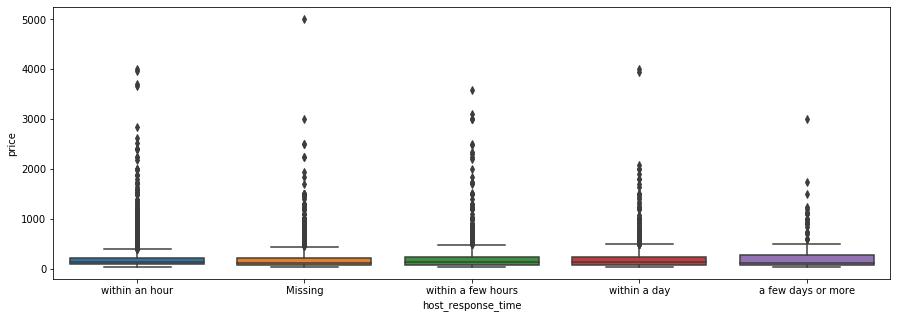

In [99]:
plt.figure(figsize=(15,5))
sns.boxplot(x="host_response_time", y="price", data=data);

### Host verifications

In [149]:
x = data['host_verifications']
x = [item.strip('[').strip(']').split(",") for item in x]
x = [subitem.lstrip().strip("'") for item in x for subitem in item]

In [150]:
from collections import Counter
count = Counter(x)
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index':'host_verifications', 0:'count'})
df = df.sort_values(by = 'count', ascending = False)
df['% of the whole column'] = df['count'].div(len(x))*100

df

,host_verifications,count,% of the whole column
1,phone,10569,18.263033
0,email,9765,16.873736
5,government_id,7797,13.473069
3,reviews,6806,11.760640
4,jumio,6689,11.558466
6,offline_government_id,5028,8.688289
8,selfie,3290,5.685058
9,identity_manual,3120,5.391301
2,facebook,2128,3.677144
7,work_email,1751,3.025695


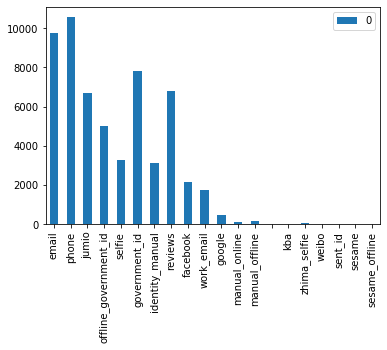

In [102]:
from collections import Counter
letter_counts = Counter(x)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

### Amenities

In [103]:
x = data['amenities']
x = [item.strip("{").strip("}").replace('"', '').split(",") for item in x]
x = [word for item in x for word in item]

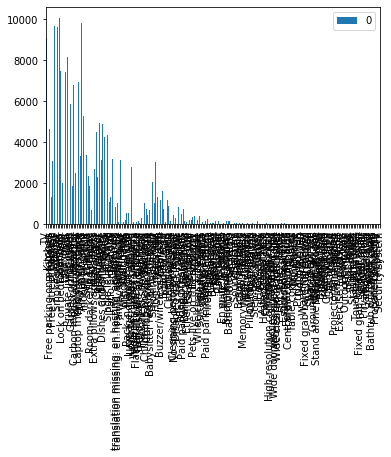

In [104]:
from collections import Counter
letter_counts = Counter(x)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

In [105]:
count = Counter(x)
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index':'ammenities', 0:'count'})
df = df.sort_values(by = 'count', ascending = False)
df['% of the whole column'] = df['count'].div(len(x))*100

df

,ammenities,count,% of the whole column
1,Kitchen,10095,4.144174
8,Essentials,10039,4.121185
22,Wifi,9819,4.030871
5,Washer,9670,3.969704
7,Smoke detector,9615,3.947125
0,TV,9081,3.727909
11,Hangers,8741,3.588333
13,Iron,8173,3.355159
9,Shampoo,7485,3.072723
12,Hair dryer,7442,3.055071


## Numerical Features

In [106]:
numerical = ['host_response_rate',
            'host_acceptance_rate',
            'security_deposit_perc',
            'cleaning_fee_perc',
            'extra_people_perc']

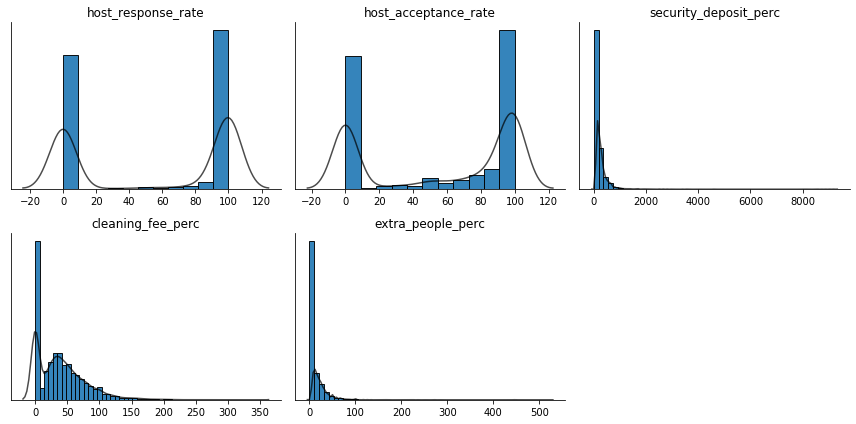

In [107]:
from statlearning import plot_dists
plot_dists(data[numerical]) 
plt.show()

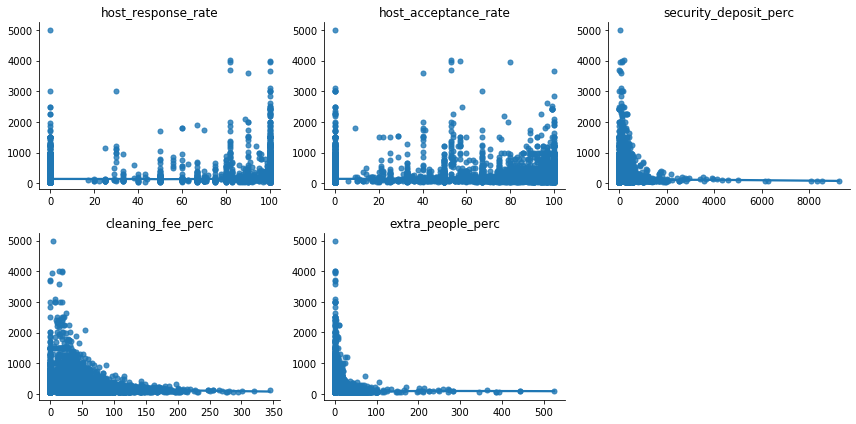

In [108]:
from statlearning import plot_regressions
plot_regressions(data[numerical],data['price'],lowess = True) 
plt.show()

In [109]:
variable = numerical

columns=['Frequency is null','% is null']

rows= variable

results=pd.DataFrame(0.0, columns=columns, index=rows) 

for i,r in enumerate(rows):
    results.iloc[i,0] =  data[r].isnull().sum()
    results.iloc[i,1] =  data[r].isnull().sum()/len(data[r])*100
    
# results = results.sort_values(by = 'median price', ascending = False)
results

,Frequency is null,% is null
host_response_rate,0.0,0.0
host_acceptance_rate,0.0,0.0
security_deposit_perc,0.0,0.0
cleaning_fee_perc,0.0,0.0
extra_people_perc,0.0,0.0


## Discrete Features

### Minimum/Maximum Nights

In [110]:
min_nights = ['minimum_nights',
             'minimum_minimum_nights',
             'maximum_minimum_nights',
             'minimum_nights_avg_ntm']

In [111]:
data[min_nights].describe()

,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm
count,10635.000000,10635.000000,10635.000000,10635.000000
mean,4.881147,4.533709,5.294875,4.935628
std,16.620106,16.067742,16.825615,16.485326
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.300000
50%,2.000000,2.000000,3.000000,2.000000
75%,5.000000,4.000000,5.000000,5.000000
max,1000.000000,1000.000000,1000.000000,1000.000000


In [112]:
max_nights = ['maximum_nights',
             'minimum_maximum_nights',
             'maximum_maximum_nights',
             'maximum_nights_avg_ntm']

In [113]:
data[max_nights].describe()

,maximum_nights,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
count,10635.000000,1.063500e+04,1.063500e+04,1.063500e+04
mean,683.894311,4.045733e+05,4.045795e+05,4.045756e+05
std,543.132683,2.944798e+07,2.944798e+07,2.944798e+07
min,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
25%,30.000000,3.100000e+01,3.100000e+01,3.100000e+01
50%,1125.000000,1.125000e+03,1.125000e+03,1.125000e+03
75%,1125.000000,1.125000e+03,1.125000e+03,1.125000e+03
max,10000.000000,2.147484e+09,2.147484e+09,2.147484e+09


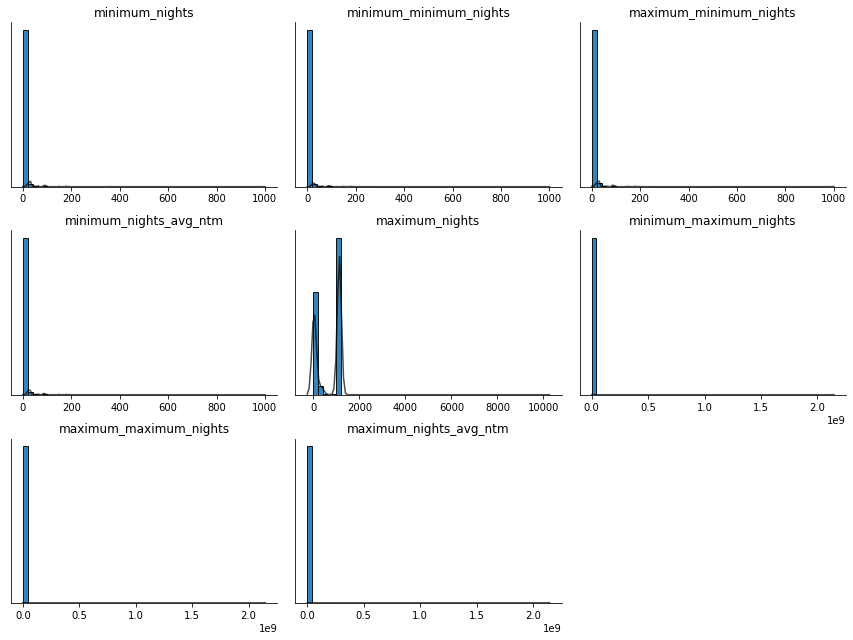

In [114]:
plot_dists(data[min_nights + max_nights]) 
plt.show()

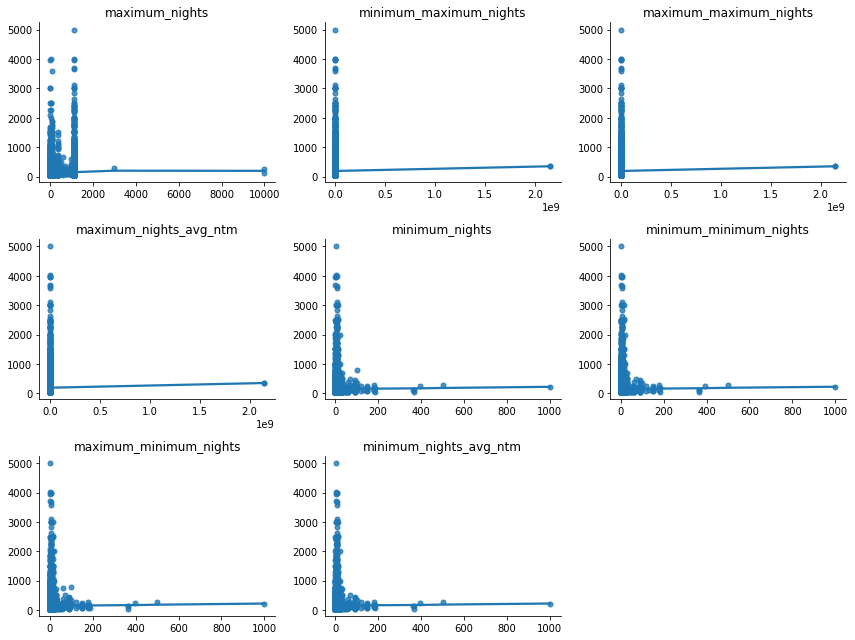

In [115]:
from statlearning import plot_regressions
plot_regressions(data[max_nights+min_nights],data['price'],lowess = True) 
plt.show()

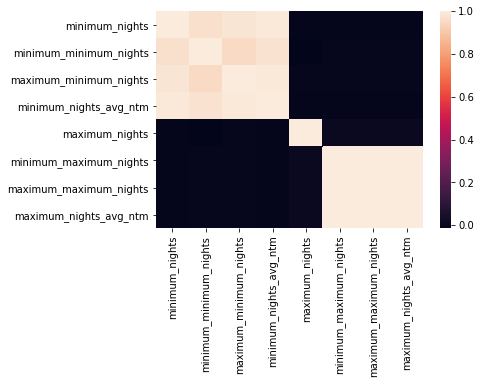

In [116]:
# Find collinearity
sns.heatmap(data[min_nights + max_nights].corr())  

### Availability

In [117]:
availability = ['availability_30',
             'availability_60',
             'availability_90',
             'availability_365']

In [118]:
data[availability].describe()

,availability_30,availability_60,availability_90,availability_365
count,10635.000000,10635.000000,10635.000000,10635.000000
mean,7.060555,16.993418,28.417489,93.840056
std,10.124433,21.721811,34.055443,124.107954
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000,19.000000
75%,13.000000,35.000000,61.000000,165.000000
max,30.000000,60.000000,90.000000,365.000000


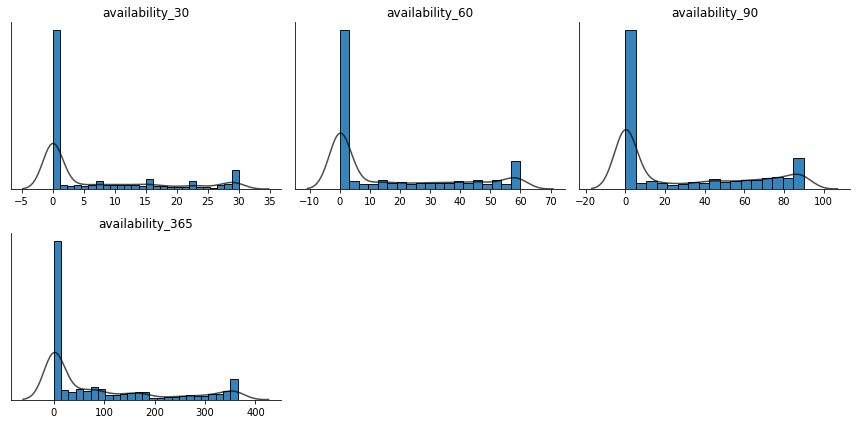

In [119]:
plot_dists(data[availability]) 
plt.show()

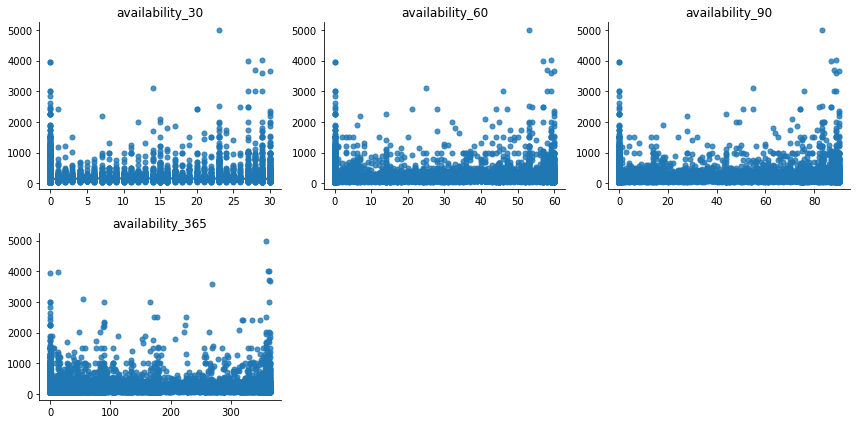

In [120]:
from statlearning import plot_regressions
plot_regressions(data[availability],data['price'],lowess = True) 
plt.show()

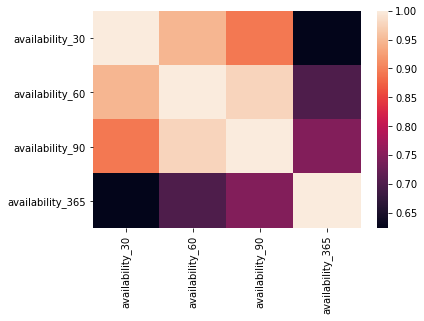

In [121]:
# Find collinearity
sns.heatmap(data[availability].corr())  

### Review

In [122]:
reviews = ['review_scores_rating',
            'review_scores_accuracy',
            'review_scores_cleanliness',
            'reviews_per_month',
            'review_scores_checkin',
            'review_scores_communication',
            'review_scores_location',
            'review_scores_value']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025540AFAEC8>,
      dtype=object)

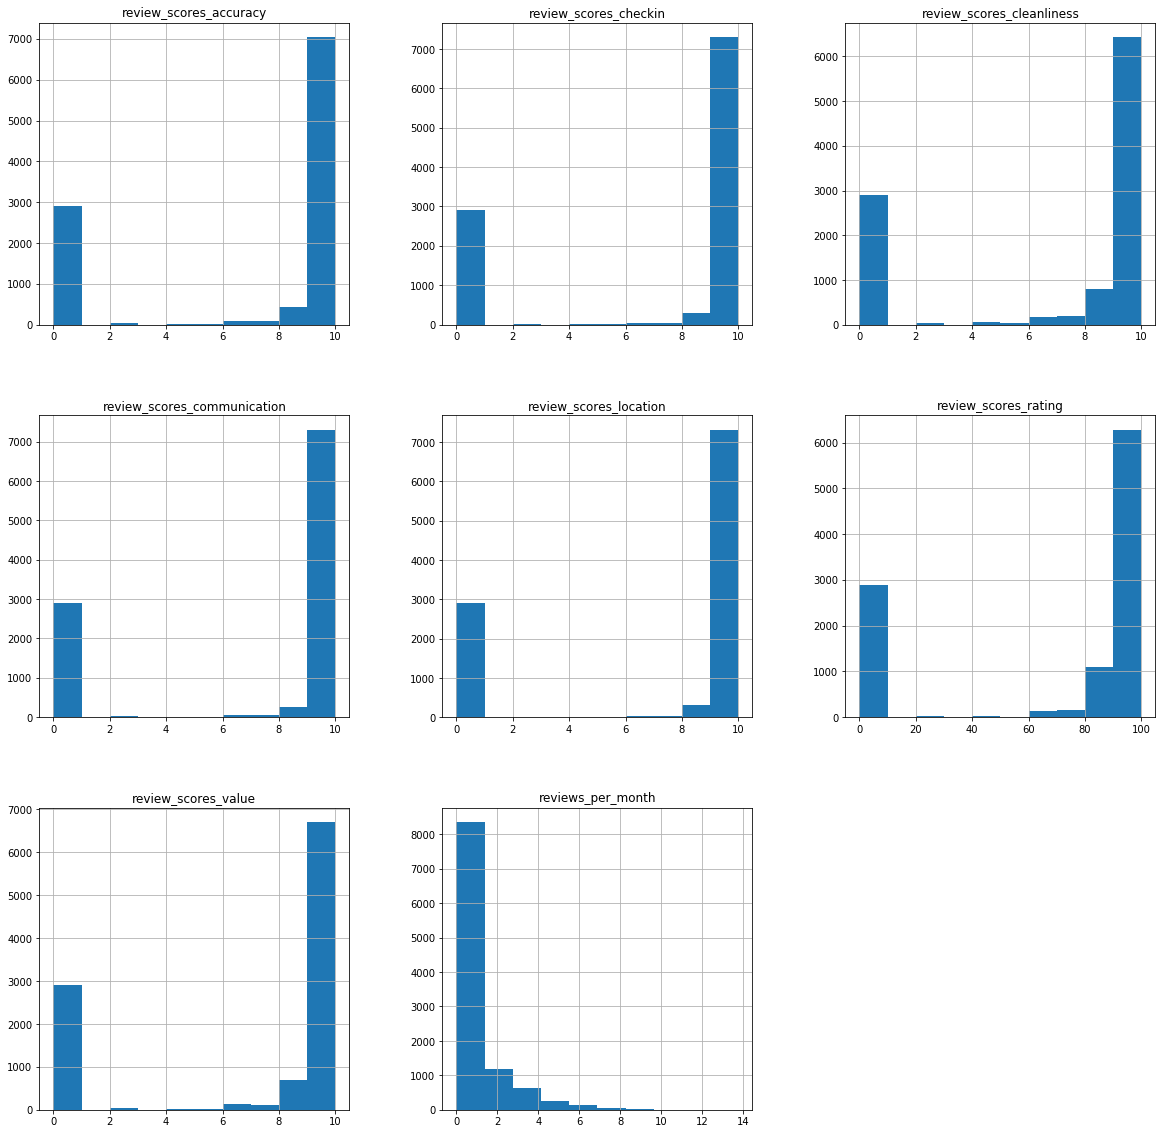

In [123]:
data[reviews].hist(figsize=(20,20))

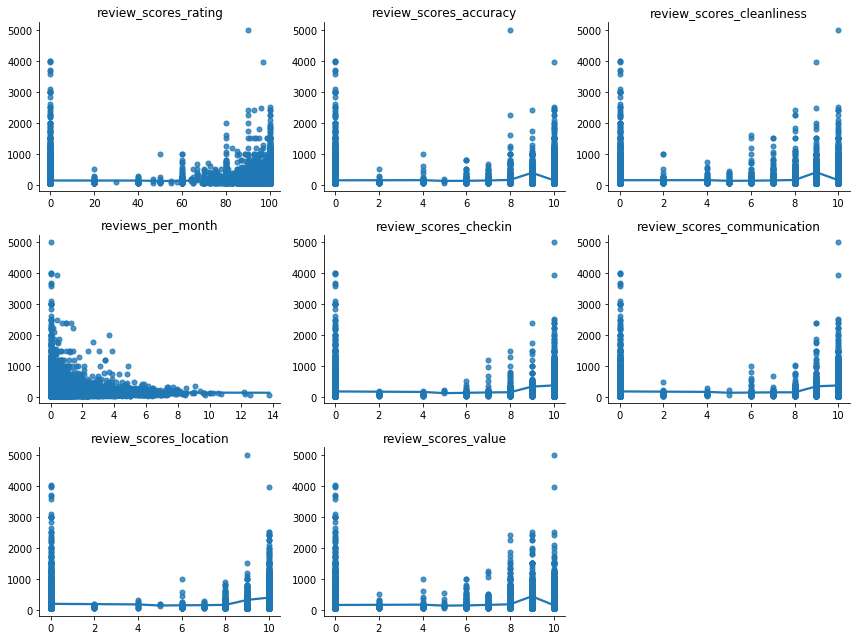

In [124]:
from statlearning import plot_regressions
plot_regressions(data[reviews],data['price'],lowess = True) 
plt.show()

In [125]:
data[reviews].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,reviews_per_month,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,10635.000000,10635.000000,10635.000000,10635.000000,10635.000000,10635.000000,10635.000000,10635.000000
mean,68.037047,6.943394,6.724495,0.874980,7.065068,7.070240,7.063094,6.763705
std,42.460197,4.337206,4.245197,1.406924,4.390144,4.387997,4.380920,4.245468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000
50%,93.000000,10.000000,9.000000,0.220000,10.000000,10.000000,10.000000,9.000000
75%,100.000000,10.000000,10.000000,1.100000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,13.760000,10.000000,10.000000,10.000000,10.000000


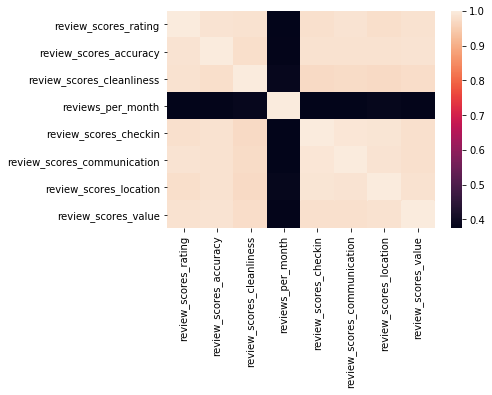

In [126]:
# Find collinearity
sns.heatmap(data[reviews].corr())  

### Host Listings

In [127]:
listings = ['host_listings_count',
            'host_total_listings_count',
            'calculated_host_listings_count',
            'calculated_host_listings_count_entire_homes',
            'calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000255406B9108>,
      dtype=object)

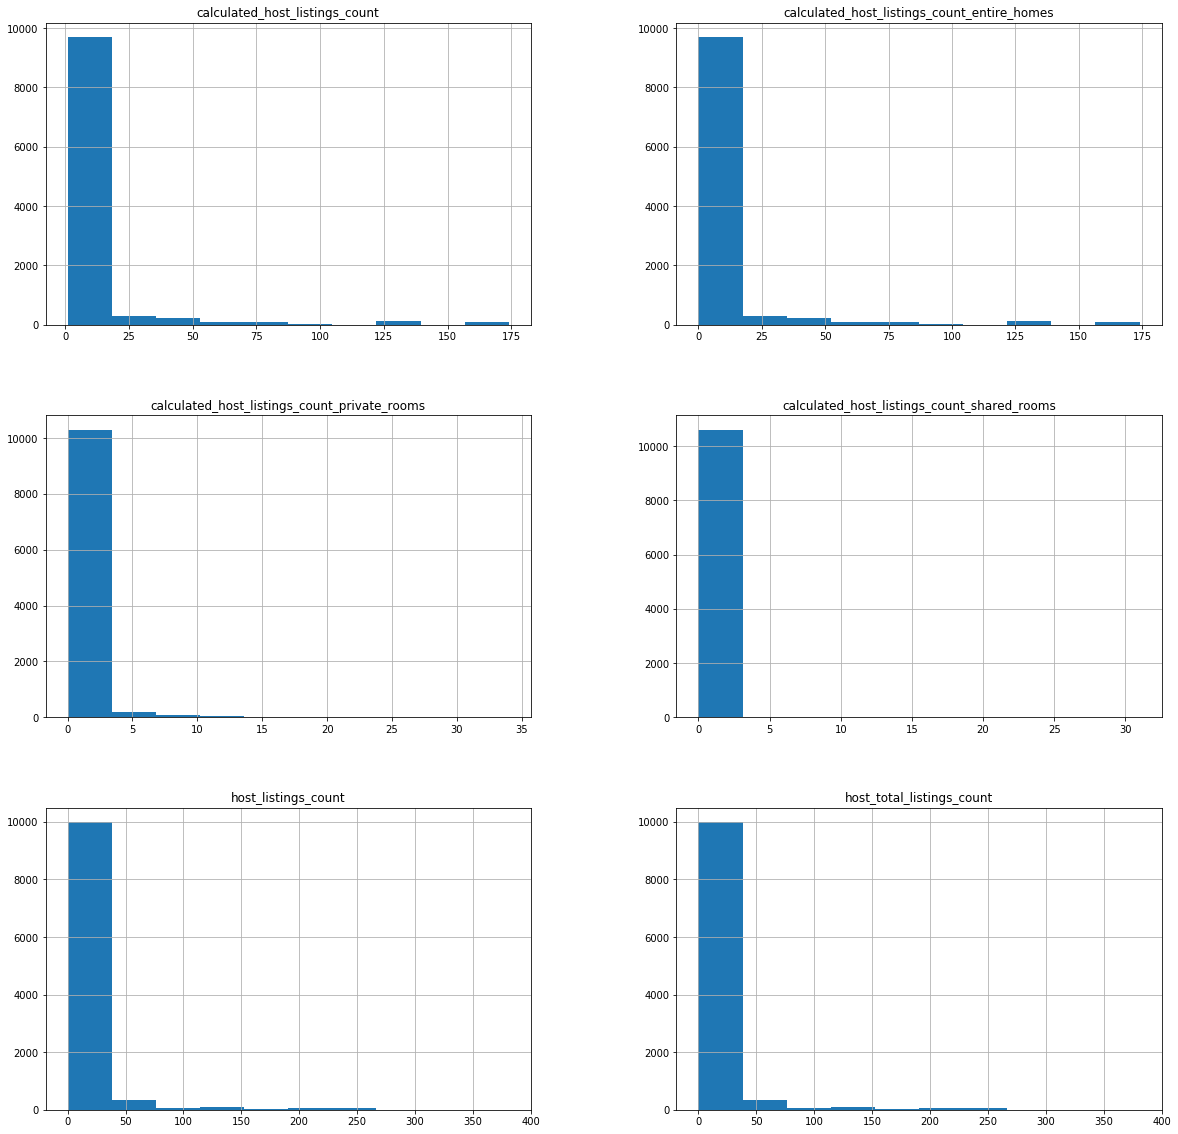

In [128]:
data[listings].hist(figsize=(20,20))

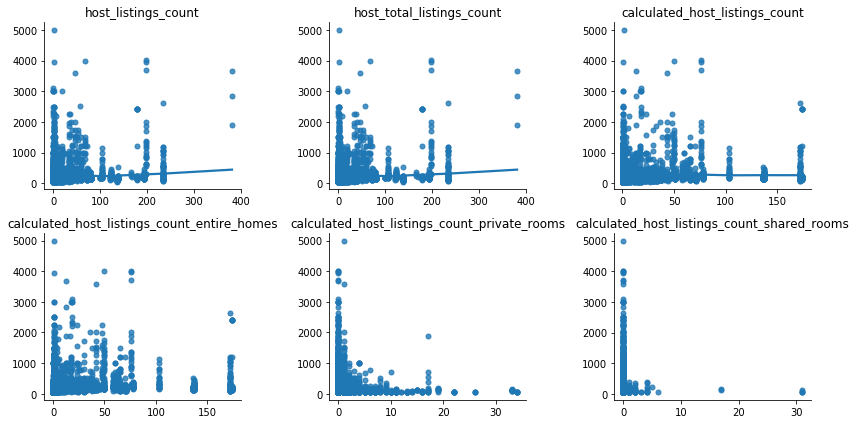

In [129]:
from statlearning import plot_regressions
plot_regressions(data[listings],data['price'],lowess = True) 
plt.show()

In [130]:
data[listings].describe()

,host_listings_count,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,10635.000000,10635.000000,10635.000000,10635.000000,10635.000000,10635.000000
mean,9.384015,9.384015,8.107193,7.309450,0.705219,0.031218
std,29.820464,29.820464,23.913682,23.904476,2.149414,0.671264
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,3.000000,3.000000,3.000000,2.000000,1.000000,0.000000
max,381.000000,381.000000,174.000000,174.000000,34.000000,31.000000


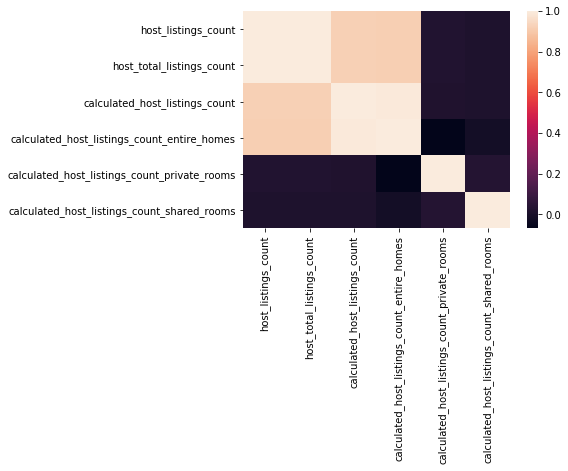

In [131]:
# Find collinearity
sns.heatmap(data[listings].corr())  

### Beds, Bathrooms and Accommodates

In [132]:
bba = ['bedrooms',
        'bathrooms',
        'beds',
        'accommodates',
        'guests_included']

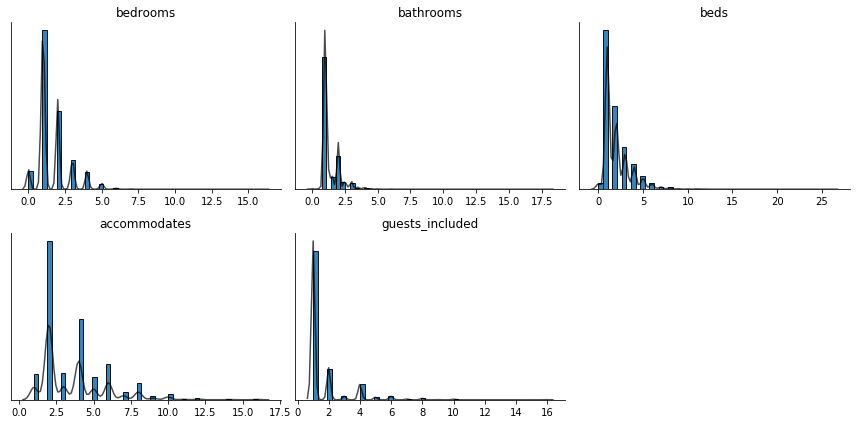

In [133]:
plot_dists(data[bba]) 
plt.show()

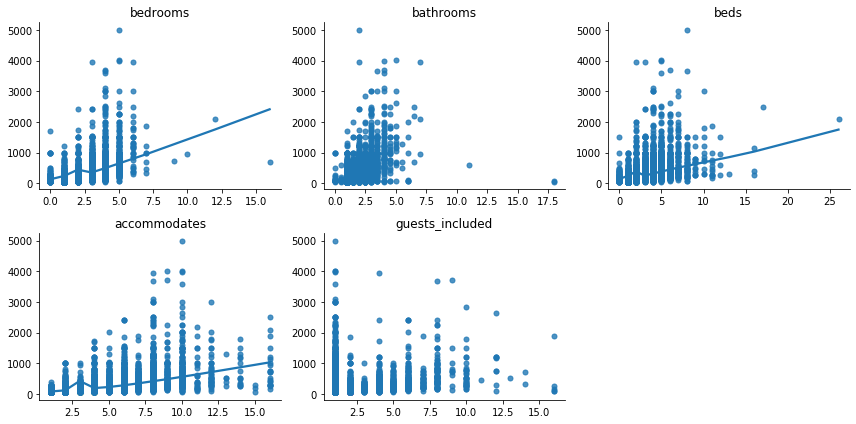

In [134]:
from statlearning import plot_regressions
plot_regressions(data[bba],data['price'],lowess = True) 
plt.show()

In [135]:
data[bba].describe()

,bedrooms,bathrooms,beds,accommodates,guests_included
count,10635.000000,10635.000000,10635.000000,10635.000000,10635.000000
mean,1.642313,1.383122,2.072308,3.614104,1.675223
std,1.100351,0.722025,1.544262,2.259294,1.468246
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,2.000000,3.000000,1.000000
75%,2.000000,2.000000,3.000000,4.000000,2.000000
max,16.000000,18.000000,26.000000,16.000000,16.000000


In [136]:
columns=['Median',
         'Mean', 
         'no. host with median listings', 
         '% host with median listings',
         'Min value',
         'Max value',
         'Median price for properties with median count']

rows=bba
results=pd.DataFrame(0.0, columns=columns, index=rows) 

for i,r in enumerate(rows):
    results.iloc[i,0] =  data[r].median()
    results.iloc[i,1] =  data[r].mean()
    results.iloc[i,2] =  len(data[data[r]==data[r].median()])
    results.iloc[i,3] =  (len(data[data[r]==data[r].median()]))/len(data[r])*100
    results.iloc[i,4] = data[r].min()
    results.iloc[i,5] = data[r].max()
    results.iloc[i,6] =  data.loc[data.bed_type[data[r]==data[r].median()].index.tolist(),'price'].median()
    
results = results.sort_values(by = 'Median price for properties with median count', ascending = False)
results

,Median,Mean,no. host with median listings,% host with median listings,Min value,Max value,Median price for properties with median count
beds,2.0,2.072308,2582.0,24.278326,0.0,26.0,159.0
accommodates,3.0,3.614104,734.0,6.901740,1.0,16.0,130.5
guests_included,1.0,1.675223,7604.0,71.499765,1.0,16.0,127.0
bathrooms,1.0,1.383122,7183.0,67.541138,0.0,18.0,121.0
bedrooms,1.0,1.642313,5480.0,51.527974,0.0,16.0,100.0


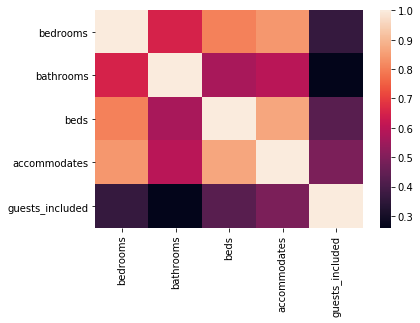

In [137]:
# Find collinearity
sns.heatmap(data[bba].corr()) 

## Loacation

No handles with labels found to put in legend.


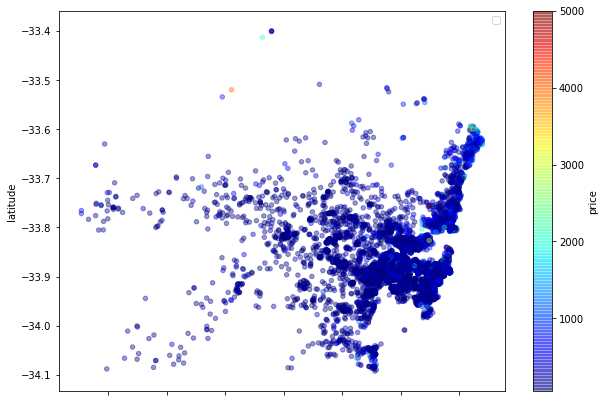

In [138]:
# Plot price
data.plot(kind="scatter", x="longitude", y="latitude",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [139]:
# Sort data by price
data = data.sort_values(by = 'price', ascending = False)
money = 400
n = len(data[data['price']>money])
print(f'total number of properties above {money} is {n}')
print(f'% of properties above {money} is {n/len(data.price)*100}')

total number of properties above 400 is 1061
% of properties above 400 is 9.976492712740951


No handles with labels found to put in legend.


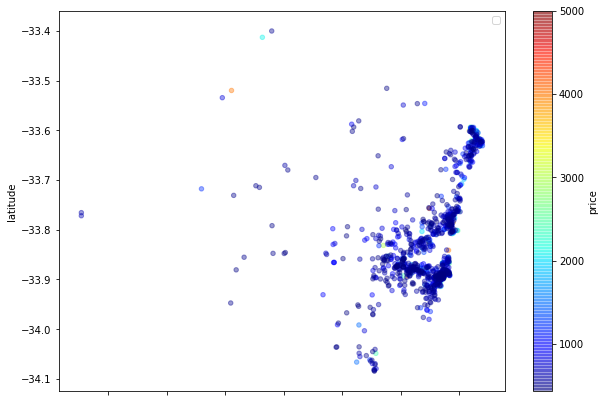

In [140]:
# Around top 10% of the price
data[0:1000].plot(kind="scatter", x="longitude", y="latitude",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

No handles with labels found to put in legend.


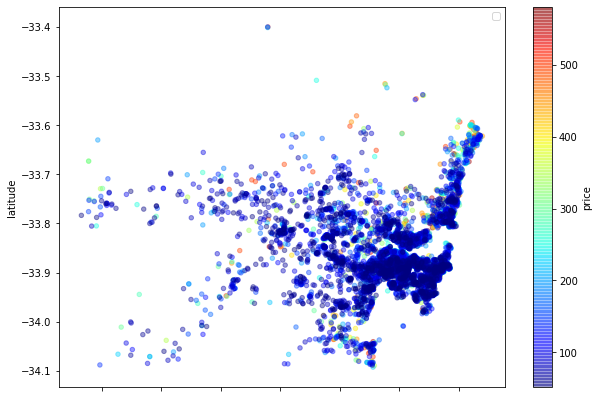

In [141]:
# Around bottom 10% of the price
data[-10000:].plot(kind="scatter", x="longitude", y="latitude",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

## Collinearity

In [142]:
# The follow code was from 
# https://github.com/gracecarrillo/Predicting-Airbnb-prices-with-machine-learning-and-location-data/blob/gh-pages/Exploring_Edinburgh_Graciela_Carrillo.ipynb?
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

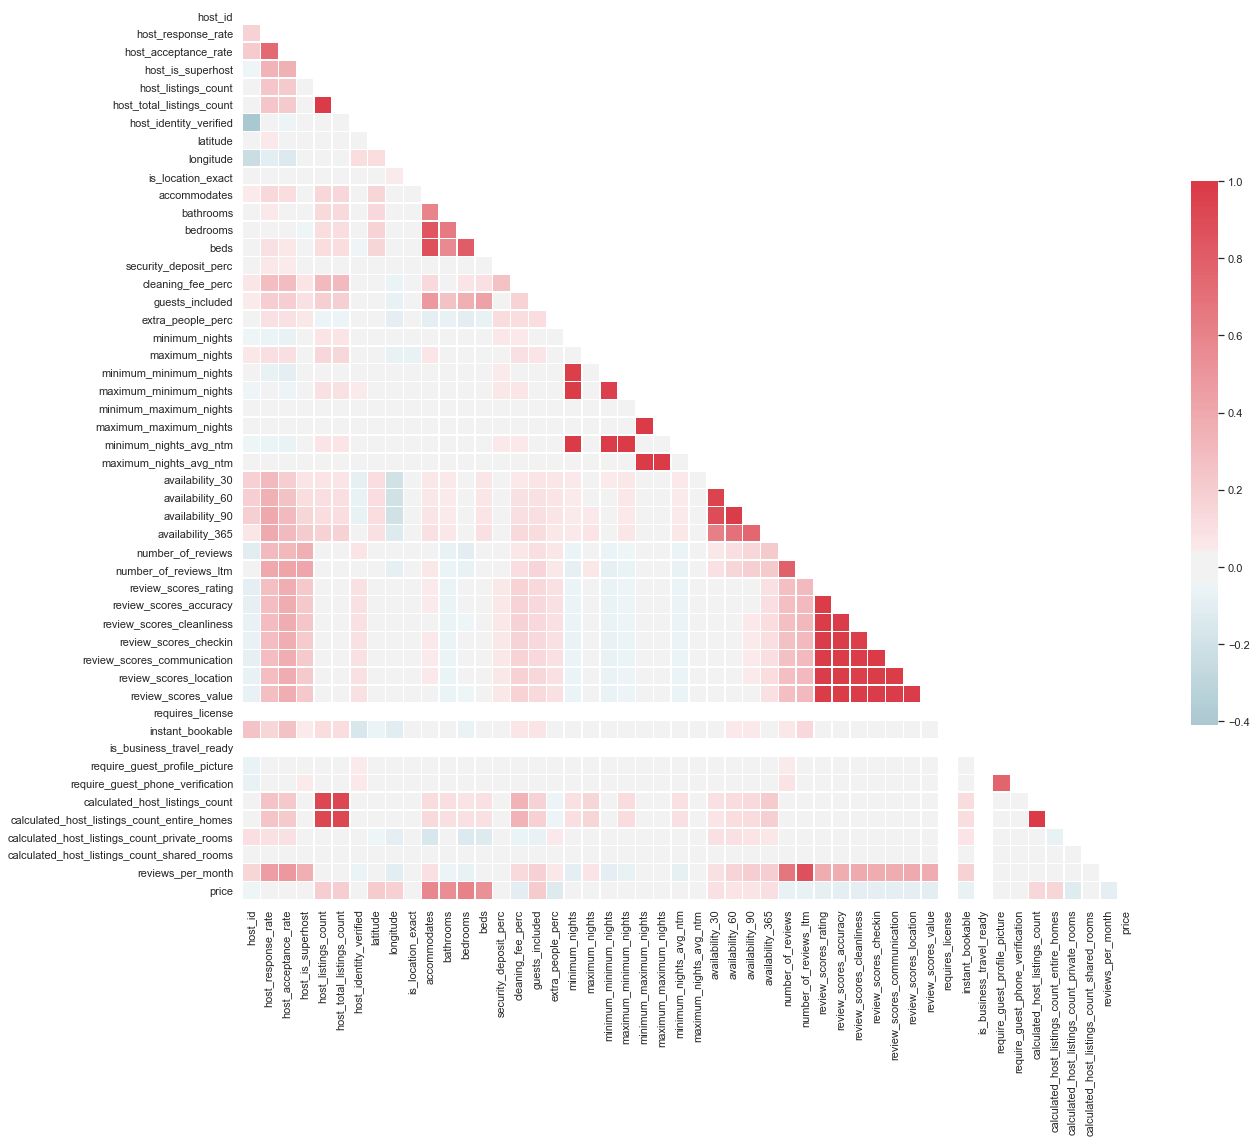

In [143]:
multi_collinearity_heatmap(data, figsize=(20,20))

In [144]:
# #Test data
# data = data.drop('id', axis = 1)
# data.to_csv(r'C:\Users\susum\Documents\year5_sem1\QBUS3820\Group_Assignment\final_version\preprocessing_test.csv',index = False, header = True)

In [145]:
#Train data
data.to_csv(r'C:\Users\susum\Documents\year5_sem1\QBUS3820\Group_Assignment\final_version\preprocessing_train.csv',index = False, header = True)